<a href="https://colab.research.google.com/github/angielpenap-debug/Bici-al-Trabajo-2026/blob/main/Taller_Bici_al_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

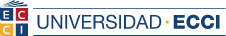
# **SISTEMAS AVANZADOS DE PRODUCCI√ìN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas p√∫blicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en d√≠as laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (m√°s estaciones, reubicaci√≥n y personal), piden un an√°lisis exploratorio riguroso con el hist√≥rico Capital Bikeshare 2011‚Äì2012 (day.csv).

Tu misi√≥n es cuantificar c√≥mo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estad√≠sticos b√°sicos y comprobar con evidencia si hoy, bajo condiciones t√≠picas, la media diaria en d√≠as laborales alcanza (o no) el umbral de 4.500. Adem√°s, deber√°s comunicar una medida robusta del uso t√≠pico (mediana) para reportes p√∫blicos, donde la distribuci√≥n puede ser asim√©trica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a trav√©s de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un l√≠der y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuraci√≥n del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (l√≠der)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (L√≠der) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un l√≠der de grupo.
    * Aseg√∫rate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripci√≥n.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el √≠cono del l√°piz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qu√© parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendaci√≥n:** Anoten esta divisi√≥n de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **A√±adir Colaboradores:**
    * En la p√°gina principal del repositorio, ve a **Settings > Collaborators**.
    * A√±ade a los dem√°s integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deber√°n aceptar la invitaci√≥n que les llegar√° por correo o en el simbolo de sobre que esta en la pag√≠na principal de github.
    * Protege main (Settings ‚Üí Branches ‚Üí Add rule):

5.  **Guardar los Cambios en GitHub (¬°Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Aseg√∫rate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qu√© hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas m√°s comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las caracter√≠sticas (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza m√≠nima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selecci√≥n de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¬øLa distribuci√≥n de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gr√°fico Q-Q?

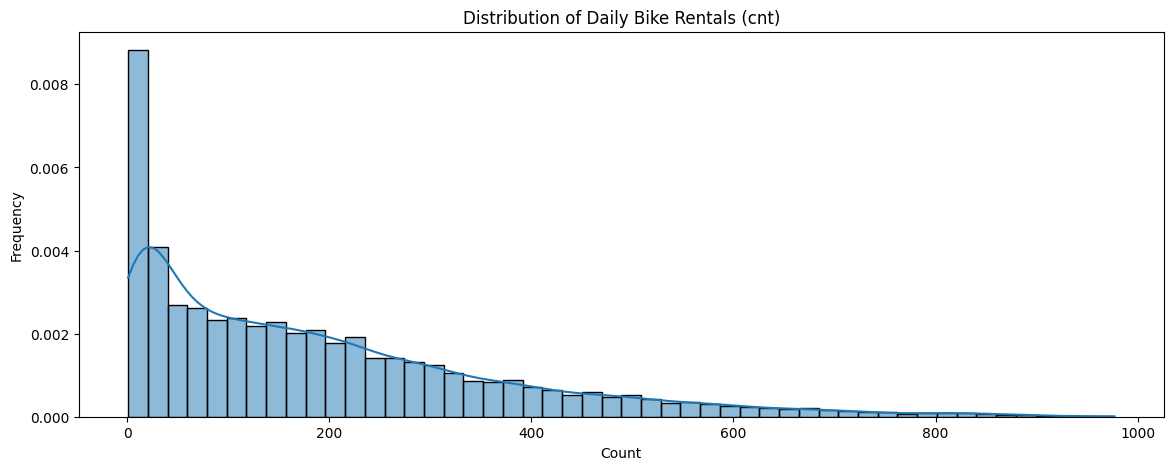

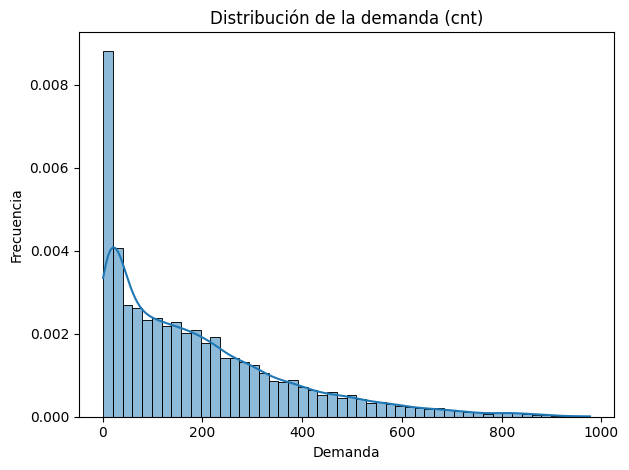


=== D‚ÄôAgostino K^2 en log(W) ===
Estad√≠stico: 3,459.832 | p-valor: 0.000e+00

Interpretaci√≥n sugerida:
- Si el histograma y QQ-plot de W muestran cola derecha marcada y p-valor peque√±o, la Normal NO es buen modelo para W.
- Si log(W) se ve m√°s lineal en el QQ-plot y el ajuste visual mejora, un modelo log-normal puede ser m√°s razonable.
- Con n muy grande, p-valores tienden a ser muy peque√±os incluso por desviaciones leves; revisa tambi√©n skew/kurtosis y los gr√°ficos.


In [15]:
import seaborn as sns
from scipy import stats # Import stats here

# 1. Visualizaci√≥n
plt.figure(figsize=(14, 5))
sns.histplot(df['cnt'], bins=50, stat='density', kde=True) # Use sns.histplot for plotting histogram
plt.title('Distribution of Daily Bike Rentals (cnt)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['cnt'], bins=50, stat='density', kde=True) # Corrected variable name from W to df['cnt'] and used sns.histplot
plt.title("Distribuci√≥n de la demanda (cnt)")
plt.xlabel("Demanda")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Prueba en log
# Corrected variable name from Y to df['cnt']
k2_stat_log, k2_p_log = stats.normaltest(df['cnt'], nan_policy='omit')
print("\n=== D‚ÄôAgostino K^2 en log(W) ===")
print(f"Estad√≠stico: {k2_stat_log:,.3f} | p-valor: {k2_p_log:.3e}")

print("\nInterpretaci√≥n sugerida:")
print("- Si el histograma y QQ-plot de W muestran cola derecha marcada y p-valor peque√±o, la Normal NO es buen modelo para W.")
print("- Si log(W) se ve m√°s lineal en el QQ-plot y el ajuste visual mejora, un modelo log-normal puede ser m√°s razonable.")
print("- Con n muy grande, p-valores tienden a ser muy peque√±os incluso por desviaciones leves; revisa tambi√©n skew/kurtosis y los gr√°ficos.")

### **Interpretaci√≥n pregunta 1**

In [17]:
n = len(df['cnt'])
media = df['cnt'].mean()
varianza_muestral = df['cnt'].var()

print(f"Tama√±o muestral: {n}")
print(f"Media (ŒºÃÇ): {media:.2f}")
print(f"Varianza muestral: {varianza_muestral:.2f}")

Tama√±o muestral: 17379
Media (ŒºÃÇ): 189.46
Varianza muestral: 32901.46


**PREGUNTA 2**
¬øC√≥mo co-var√≠a cnt con temp, hum y windspeed? ¬øLa relaci√≥n es lineal o solo mon√≥tona?. Ayuda: Calcular la correlaci√≥n de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

# Calcular la correlaci√≥n de Pearson
pearson_corr = df[columnas_relacion].corr(method='pearson')
print("Correlaci√≥n de Pearson:")
display(pearson_corr)

# Calcular la correlaci√≥n de Spearman
spearman_corr = df[columnas_relacion].corr(method='spearman')
print("\nCorrelaci√≥n de Spearman:")
display(spearman_corr)

Correlaci√≥n de Pearson:


cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000


Correlaci√≥n de Spearman:


cnt      temp       hum  windspeed
cnt        1.000000  0.423330 -0.359614   0.126629
temp       0.423330  1.000000 -0.055408  -0.009719
hum       -0.359614 -0.055408  1.000000  -0.293913
windspeed  0.126629 -0.009719 -0.293913   1.000000

### **Interpretaci√≥n pregunta 2**


## **PREGUNTA 3**
¬øDesde qu√© tama√±o muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**


El Teorema del L√≠mite Central (TLC) establece que, bajo ciertas condiciones, la distribuci√≥n de la media muestral se aproxima a una normal conforme el tama√±o de muestra
ùëõ
n crece, independientemente de la distribuci√≥n original de la poblaci√≥n

## **PREGUNTA 4**
En d√≠as laborales, ¬øla media de cnt ‚â• 4.500? (plantea y resuelve un test de hip√≥tesis de una muestra).

In [ ]:
# 1. Filtrar datos de d√≠as laborales
import numpy as np, pandas as pd
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las caracter√≠sticas (X) y el objetivo (y)
df = bike.data.original.copy()

# 3. Limpieza m√≠nima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

# 4. Selecci√≥n de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500
# Test de hip√≥tesis: ¬ømedia de cnt_laborales >= 4500?
from scipy.stats import ttest_1samp

# Ejecutamos t-test
t_stat, p_val_bilateral = ttest_1samp(cnt_laborales, valor_hipotesis)

# Como la prueba es unilateral (H1: media > 4500):
if t_stat > 0:
    p_val_unilateral = p_val_bilateral / 2
else:
    p_val_unilateral = 1 - (p_val_bilateral / 2)

print(f"Media muestral = {cnt_laborales.mean():.2f}")
print(f"T-Statistic = {t_stat:.4f}")
print(f"P-valor (unilateral) = {p_val_unilateral:.4f}")

# Decisi√≥n con Œ±=0.05
alpha = 0.05
if p_val_unilateral < alpha:
    print("‚úÖ Rechazamos H0: la media de cnt en d√≠as laborales es significativamente mayor a 4500.")
else:
    print("‚ùå No podemos rechazar H0: no hay evidencia suficiente de que la media sea mayor a 4500.")

#Si el p-valor < 0.05, concluimos que efectivamente la media de cnt en d√≠as laborales es significativamente mayor a 4500.

#Si no, decimos que no hay suficiente evidencia.

Media muestral = 193.21
T-Statistic = -2534.3339
P-valor (unilateral) = 1.0000
‚ùå No podemos rechazar H0: no hay evidencia suficiente de que la media sea mayor a 4500.


### **Interpretaci√≥n pregunta 4**

## **PREGUNTA 5**
¬øCu√°l es un IC bootstrap para la mediana de cnt y c√≥mo cambia tu mensaje si la distribuci√≥n es sesgada?

Mediana observada (muestra): 142.00
Mediana bootstrap (promedio remuestreos): 142.09
Bias estimado (bootstrap - observada): 0.09
IC bootstrap percentil 95% para la mediana: [138.00, 146.00]


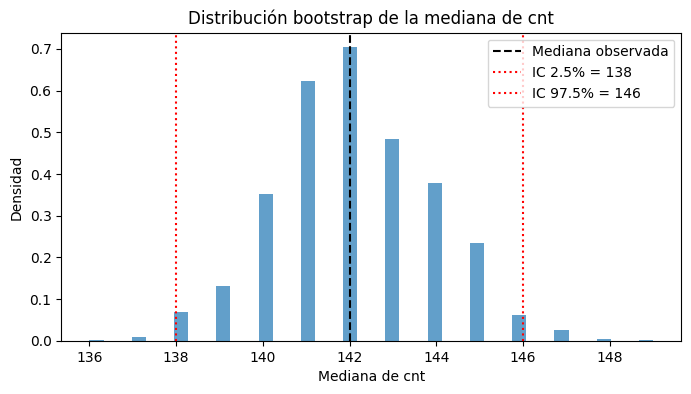

In [ ]:
# N√∫mero de remuestreos
n_iterations = 5000
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las caracter√≠sticas (X) y el objetivo (y)
df = bike.data.original.copy()

# 3. Limpieza m√≠nima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

# 4. Selecci√≥n de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

sample = df['cnt'].values
n = len(sample)
rng = np.random.default_rng(123)  # reproducibilidad

# Remuestreo bootstrap: calcular medianas
medians = np.empty(n_iterations)
for i in range(n_iterations):
    idx = rng.integers(0, n, size=n)   # muestreo con reemplazo
    medians[i] = np.median(sample[idx])

# IC percentil 95% (2.5% - 97.5%)
alpha = 0.05
lower, upper = np.percentile(medians, [100*alpha/2, 100*(1-alpha/2)])

# Estad√≠sticos
median_observada = np.median(sample)
mean_boot = medians.mean()
bias = mean_boot - median_observada

print(f"Mediana observada (muestra): {median_observada:.2f}")
print(f"Mediana bootstrap (promedio remuestreos): {mean_boot:.2f}")
print(f"Bias estimado (bootstrap - observada): {bias:.2f}")
print(f"IC bootstrap percentil 95% para la mediana: [{lower:.2f}, {upper:.2f}]")

# Gr√°fico de la distribuci√≥n bootstrap de las medianas
plt.figure(figsize=(8,4))
plt.hist(medians, bins=40, density=True, alpha=0.7)
plt.axvline(median_observada, color='black', linestyle='--', label='Mediana observada')
plt.axvline(lower, color='red', linestyle=':', label=f'IC 2.5% = {lower:.0f}')
plt.axvline(upper, color='red', linestyle=':', label=f'IC 97.5% = {upper:.0f}')
plt.title('Distribuci√≥n bootstrap de la mediana de cnt')
plt.xlabel('Mediana de cnt')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Interpretaci√≥n pregunta 5

In [ ]:
!pip install ucimlrepo -q